# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries you will be using for analysis
import numpy as np      
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns    

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
df = pd.read_parquet('Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()
# df = pd.read_parquet('2023-1.parquet')
# df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/professorx/Documents/PythonUpgrad/EDA Assignment/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_data = pd.read_parquet(file_path)
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_data['tpep_pickup_datetime'].dt.date.unique():
            daily_data = monthly_data[monthly_data['tpep_pickup_datetime'].dt.date == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                hourly_data = daily_data[daily_data['tpep_pickup_datetime'].dt.hour == hour]

                # Sample 5% of the hourly data randomly
                if not hourly_data.empty:
                    hourly_sample = hourly_data.sample(frac= 0.05 , random_state = 42)

                # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data,hourly_sample],ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df,sampled_data],ignore_index = True)# we initialised this empty DF earlier
        print('Merged successfully ..')
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Merged successfully ..
Merged successfully ..
Merged successfully ..
Error reading file .DS_Store: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Merged successfully ..
Merged successfully ..
Merged successfully ..
Merged successfully ..
Merged successfully ..
Merged successfully ..
Merged successfully ..
Merged successfully ..
Error reading file .ipynb_checkpoints: 'tpep_pickup_datetime'
Merged successfully ..
Merged successfully ..


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in csv/parquet
# df.to_parquet('')
target_rows = 300_000
if len(df) > target_rows:
    df = df.sample(n=target_rows, random_state=42)

df.to_parquet('nyc_taxi_final.parquet', index=False)
print("Final dataset saved as 'nyc_taxi_final.parquet'")

Final dataset saved as 'nyc_taxi_final.parquet'


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file
df = pd.read_parquet('/Users/professorx/Documents/PythonUpgrad/EDA Assignment/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/trip_records/nyc_taxi_final.parquet')
print("Data loaded successfully. Shape:", df.shape)

Data loaded successfully. Shape: (300000, 20)


In [10]:
# df.head()
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,2,2023-11-24 16:57:33,2023-11-24 16:58:33,1.0,0.01,1.0,N,237,237,4,3.0,2.5,0.5,0.00,0.0,1.0,9.50,2.5,0.00,NaN
1,2,2023-03-26 17:09:01,2023-03-26 17:41:12,1.0,8.07,1.0,N,138,255,1,40.1,5.0,0.5,9.32,0.0,1.0,57.17,0.0,1.25,NaN
2,2,2023-07-03 15:42:37,2023-07-03 15:52:10,1.0,1.35,1.0,N,211,249,1,10.7,0.0,0.5,2.94,0.0,1.0,17.64,2.5,0.00,NaN
3,2,2023-02-25 17:59:49,2023-02-25 18:18:40,1.0,1.37,1.0,N,114,107,1,16.3,0.0,0.5,4.06,0.0,1.0,24.36,2.5,0.00,NaN
4,2,2023-01-08 18:27:11,2023-01-08 18:56:37,1.0,7.89,1.0,N,138,237,1,38.0,5.0,0.5,9.40,0.0,1.0,57.65,2.5,NaN,1.25


In [11]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289806 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289806 non-null  float64       
 6   store_and_fwd_flag     289806 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [12]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.drop(columns= 'store_and_fwd_flag',inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [13]:
# Combine the two airport fee columns
if 'Airport_fee' in df.columns and 'airport_fee' in df.columns:
    df['airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])
    df.drop(columns='Airport_fee',inplace=True)

In [14]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          10194
trip_distance                0
RatecodeID               10194
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     10194
airport_fee              10194
dtype: int64

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [15]:
# check where values of fare amount are negative
negative_fares=df[df['fare_amount'] < 0]
negative_fares.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


Did you notice something different in the `RatecodeID` column for above records?

In [16]:
# Analyse RatecodeID for the negative fare amounts
ratecode_negative_fares = negative_fares.groupby('RatecodeID')['fare_amount'].count()
ratecode_negative_fares.head()

Series([], Name: fare_amount, dtype: int64)

In [17]:
# Find which columns have negative values
negative_cols = {}
for col in df.select_dtypes(include=['int64','float64']).columns:
    if (df[col] < 0).any():
        negative_cols[col] = df[df[col] < 0]
for col, data in negative_cols.items():
    print(f"Column '{col}' has {data.shape[0]} negative values.")

Column 'extra' has 1 negative values.
Column 'mta_tax' has 14 negative values.
Column 'improvement_surcharge' has 14 negative values.
Column 'total_amount' has 14 negative values.
Column 'congestion_surcharge' has 11 negative values.
Column 'airport_fee' has 2 negative values.


In [18]:
# fix these negative values
neg_cols = ['mta_tax', 'improvement_surcharge', 'total_amount', 
            'congestion_surcharge', 'airport_fee']
for col in neg_cols:
    negative_count = (df[col] < 0).sum()
    if negative_count > 0:
        df = df[df[col] >= 0]
        print(f"Removed {negative_count} rows with negative values in '{col}'.")
print("Shape after removing negatives:", df.shape)

# doing above code like to multiple run code won't fail
# single run we can write directly df = df[df[col] >= 0]

Removed 14 rows with negative values in 'mta_tax'.
Shape after removing negatives: (299986, 18)


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [19]:
# Find the proportion of missing values in each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({
    'missing_count': missing_values,
    'missing_percentage': missing_percentage
}).sort_values(by='missing_percentage', ascending=False)
missing_summary

,missing_count,missing_percentage
airport_fee,10194,3.398159
congestion_surcharge,10194,3.398159
passenger_count,10194,3.398159
RatecodeID,10194,3.398159
extra,0,0.000000
total_amount,0,0.000000
improvement_surcharge,0,0.000000
tolls_amount,0,0.000000
tip_amount,0,0.000000
mta_tax,0,0.000000


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [20]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
null_passenger = df[df['passenger_count'].isnull()]
# Fill NaN values in passenger_count with 1 we can do it by median
df['passenger_count'].fillna(1, inplace=True)
print("Remaining NaN values in passenger_count:", df['passenger_count'].isnull().sum())

Remaining NaN values in passenger_count: 0


Did you find zeroes in passenger_count? Handle these.

In [21]:
zero_passenger = df[df['passenger_count']==0]
zero_passenger

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
203,1,2023-07-25 21:02:05,2023-07-25 21:23:10,0.0,4.6,1.0,114,239,1,25.4,3.5,0.5,6.08,0.0,1.0,36.48,2.5,0.0
216,1,2023-01-20 18:24:42,2023-01-20 18:29:49,0.0,0.6,1.0,143,264,2,6.5,5.0,0.5,0.00,0.0,1.0,13.00,2.5,0.0
227,1,2023-05-07 10:38:05,2023-05-07 10:59:59,0.0,2.4,1.0,48,234,1,20.5,2.5,0.5,4.41,0.0,1.0,28.91,2.5,0.0
259,1,2023-06-23 04:51:28,2023-06-23 05:10:34,0.0,9.9,1.0,107,228,1,39.4,3.5,0.5,2.00,0.0,1.0,46.40,2.5,0.0
281,1,2023-06-02 18:34:55,2023-06-02 18:43:11,0.0,1.4,1.0,137,79,1,8.6,5.0,0.5,3.02,0.0,1.0,18.12,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299803,1,2023-07-31 16:12:22,2023-07-31 16:16:15,0.0,0.5,1.0,50,163,1,5.8,5.0,0.5,3.65,0.0,1.0,15.95,2.5,0.0
299817,1,2023-01-31 17:31:58,2023-01-31 17:43:36,0.0,0.7,1.0,264,231,1,11.4,5.0,0.5,3.55,0.0,1.0,21.45,2.5,0.0
299909,1,2023-08-02 22:26:32,2023-08-02 22:31:09,0.0,1.2,1.0,100,90,2,7.9,3.5,0.5,0.00,0.0,1.0,12.90,2.5,0.0
299946,1,2023-01-22 12:37:33,2023-01-22 13:03:13,0.0,7.3,1.0,236,249,1,34.5,2.5,0.5,1.50,0.0,1.0,40.00,2.5,0.0


In [22]:
df.loc[df['passenger_count'] == 0,'passenger_count'] = 1
print("Zeros in passenger_count handled.")
print("Zero count after fix:", (df['passenger_count'] == 0).sum())

Zeros in passenger_count handled.
Zero count after fix: 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [23]:
# Fix missing values in 'RatecodeID'
print("Missing RatecodeID count:", df['RatecodeID'].isna().sum())
print("Value counts:\n", df['RatecodeID'].value_counts())
mode_ratecode = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(mode_ratecode, inplace=True)
print("RatecodeID missing values are filled with value :",mode_ratecode)

Missing RatecodeID count: 10194
Value counts:
 RatecodeID
1.0     273629
2.0      11295
99.0      1736
5.0       1647
3.0        926
4.0        559
Name: count, dtype: int64
RatecodeID missing values are filled with value : 1.0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [24]:
# handle null values in congestion_surcharge
print("Value counts:\n", df['congestion_surcharge'].value_counts())
mode_surcharge = df['congestion_surcharge'].mode()[0]
df['congestion_surcharge'].fillna(mode_surcharge, inplace=True)
print("Remaining nulls in congestion_surcharge:", df['congestion_surcharge'].isna().sum())

Value counts:
 congestion_surcharge
2.5    267490
0.0     22302
Name: count, dtype: int64
Remaining nulls in congestion_surcharge: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [25]:
# checking the remaining NaN values in any other columns
print("Columns with NaN values count:\n",df.isna().sum())

Columns with NaN values count:
 VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
airport_fee              10194
dtype: int64


In [26]:
# Handle any remaining missing values
# checking with airport_fee NaN values
print(df['airport_fee'].value_counts())
# Most trips don’t incur airport fees, so it’s safe to fill missing values with 0.0
df['airport_fee'].fillna(0.0, inplace=True)
print(df.isna().sum())

airport_fee
0.00    264380
1.75     19178
1.25      6234
Name: count, dtype: int64
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64


- No NaN values currently present in dataset

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [27]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,299986.000000,299986,299986,299986.000000,299986.000000,299986.000000,299986.000000,299986.000000,299986.000000,299986.000000,299986.000000,299986.000000,299986.000000,299986.000000,299986.000000,299986.000000,299986.000000,299986.000000
mean,1.733158,2023-07-02 15:04:08.441460,2023-07-02 15:21:33.669561,1.373374,4.208455,1.638496,165.155754,164.310088,1.164468,19.827315,1.588249,0.495342,3.548063,0.594232,0.999025,28.891220,2.314141,0.137853
min,1.000000,2023-01-01 00:05:24,2023-01-01 00:09:35,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,1.000000,2023-01-05 17:28:06.400000,2023-01-05 17:45:38.250000,1.000000,0.000000,1.000000,24.000000,10.000000,0.000000,4.400000,0.000000,0.500000,0.000000,0.000000,1.000000,8.700000,0.000000,0.000000
25%,1.000000,2023-04-02 12:38:01,2023-04-02 12:46:59.750000,1.000000,1.050000,1.000000,132.000000,114.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.960000,2.500000,0.000000
50%,2.000000,2023-06-27 12:14:06,2023-06-27 12:34:14,1.000000,1.800000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.860000,0.000000,1.000000,21.000000,2.500000,0.000000
75%,2.000000,2023-10-06 18:29:04.500000,2023-10-06 18:43:38,1.000000,3.400000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,0.500000,4.450000,0.000000,1.000000,30.900000,2.500000,0.000000
99%,2.000000,2023-12-27 12:59:14.650000,2023-12-27 13:15:10.700000,5.000000,20.210000,5.000000,264.000000,264.000000,3.000000,77.000000,7.500000,0.500000,17.540000,6.940000,1.000000,103.901500,2.500000,1.750000
max,6.000000,2023-12-31 23:57:12,2024-01-01 12:29:40,9.000000,56823.800000,99.000000,265.000000,265.000000,4.000000,544.000000,14.250000,2.500000,150.000000,87.500000,1.000000,545.000000,2.500000,1.750000
std,0.447331,NaN,NaN,0.863816,160.279846,7.438068,64.037023,69.707914,0.508925,18.087852,1.830625,0.048255,4.037070,2.169080,0.028972,22.662538,0.655824,0.457441


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [28]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
print(f'current rows count : {df.shape[0]}')
df['passenger_count'].value_counts()

current rows count : 299979


passenger_count
1.0    232504
2.0     44081
3.0     10992
4.0      6136
5.0      3845
6.0      2421
Name: count, dtype: int64

In [29]:
# Continue with outlier handling
# Entries where trip_distance is nearly 0 and fare_amount is more than 300
suspicious_fare_trips = df[(df['trip_distance'] < 0.1) & (df['fare_amount'] >= 300)]
print("Number of trips with trip_distance < 0.1 and fare > 300:", suspicious_fare_trips.shape[0])

suspicious_fare_trips[['trip_distance', 'fare_amount']].head()


Number of trips with trip_distance < 0.1 and fare > 300: 7


,trip_distance,fare_amount
22309,0.00,330.00
181535,0.01,300.00
205650,0.00,370.00
257268,0.00,305.14
260556,0.00,500.00


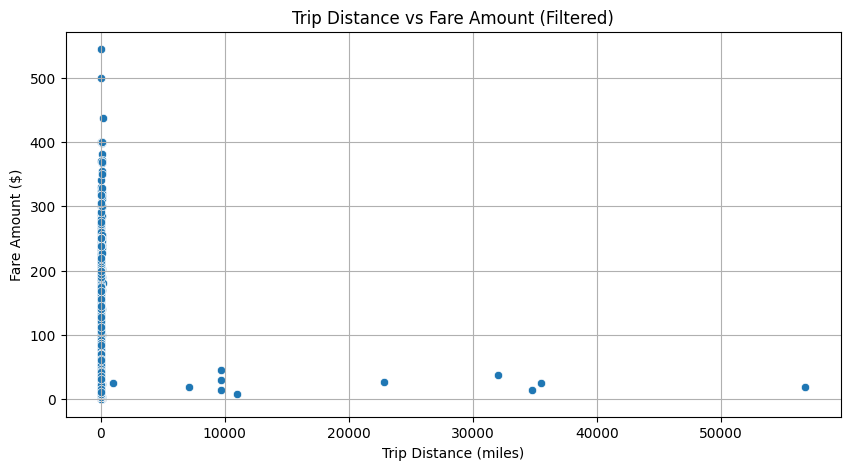

In [30]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df[df['fare_amount'] <= 1000], x='trip_distance', y='fare_amount')
plt.title('Trip Distance vs Fare Amount (Filtered)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


- We can see for trip_distance < 0.1 and fare > 300, which is totally unfare and also we are observing Entries where trip_distance and fare_amount are 0 

In [31]:
# Dropping these rows
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]
print("Dropped invalid high-fare short-distance trips.")


Dropped invalid high-fare short-distance trips.


In [32]:
# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different 
zero_distance_fare_diff_zone = df[
    (df['trip_distance'] == 0) &
    (df['fare_amount'] == 0) &
    (df['PULocationID'] != df['DOLocationID'])
]

print("Suspicious zero distance + zero fare, but different zones:", zero_distance_fare_diff_zone.shape[0])
zero_distance_fare_diff_zone[['trip_distance', 'fare_amount', 'PULocationID', 'DOLocationID']].head()


Suspicious zero distance + zero fare, but different zones: 10


,trip_distance,fare_amount,PULocationID,DOLocationID
31916,0.0,0.0,75,264
71195,0.0,0.0,261,264
82749,0.0,0.0,237,264
112393,0.0,0.0,138,264
118848,0.0,0.0,237,264


In [33]:
# Dropping the rows
df = df[~(
    (df['trip_distance'] == 0) &
    (df['fare_amount'] == 0) &
    (df['PULocationID'] != df['DOLocationID'])
)]
print("Removed rows where trip_distance & fare are 0 but PULocationID is not equal with DOLocationID.")
df.shape

Removed rows where trip_distance & fare are 0 but PULocationID is not equal with DOLocationID.


(299963, 18)

In [34]:
# Entries where trip_distance is more than 250 miles
very_long_trips = df[df['trip_distance'] > 250]
print("Trips with distance > 250 miles:", very_long_trips.shape[0])
very_long_trips[['trip_distance', 'fare_amount', 'total_amount', 'PULocationID', 'DOLocationID']].head()

Trips with distance > 250 miles: 11


,trip_distance,fare_amount,total_amount,PULocationID,DOLocationID
483,22869.37,27.39,31.39,179,237
30291,9674.01,14.20,20.20,161,68
33396,10961.43,8.60,15.10,140,263
43702,7094.16,18.81,20.31,75,42
53457,9678.97,45.00,57.94,138,161


In [35]:
df = df[~(df['trip_distance'] > 250)]
print("Removed trips with distance > 250 miles.")

Removed trips with distance > 250 miles.


In [36]:
invalid_payment_rows = df[df['payment_type'] == 0]
print("Invalid payment_type :", invalid_payment_rows.shape[0])
print(df['payment_type'].value_counts())

Invalid payment_type : 10189
payment_type
1    236095
2     50011
0     10189
4      2188
3      1469
Name: count, dtype: int64


In [37]:
payment_labels = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}
payment_percent = df['payment_type'].value_counts(normalize=True) * 100
payment_percent.index = payment_percent.index.map(payment_labels)
round(payment_percent,2)

payment_type
Credit card    78.71
Cash           16.67
NaN             3.40
Dispute         0.73
No charge       0.49
Name: proportion, dtype: float64

In [38]:
df = df[df['payment_type'] != 0]
print("Removed rows with invalid payment_type, Current df shape :", df.shape)
# payment_percent.index = payment_percent.index.map(payment_labels).fillna('Unknown')
print('done')

Removed rows with invalid payment_type, Current df shape : (289763, 18)
done


In [39]:
# more outliers
df[df['tpep_dropoff_datetime'] < df['tpep_pickup_datetime']]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
31671,2,2023-11-05 01:54:41,2023-11-05 01:00:23,1.0,0.98,1.0,249,90,1,7.9,1.0,0.5,1.94,0.0,1.0,14.84,2.5,0.0
135265,2,2023-11-05 01:40:43,2023-11-05 01:06:12,1.0,3.75,1.0,90,88,1,23.3,1.0,0.5,8.49,0.0,1.0,36.79,2.5,0.0
219939,1,2023-11-05 01:59:30,2023-11-05 01:15:33,1.0,6.10,1.0,151,107,2,24.7,3.5,0.5,0.00,0.0,1.0,29.70,2.5,0.0


In [40]:
# Dropping the all logically impossible trips
df = df[df['tpep_pickup_datetime'] <= df['tpep_dropoff_datetime']]
print('Dropped..')

Dropped..


In [41]:
# More outliers on fare_amount and trip_distance
df[df['trip_distance'] >= 75]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
27557,2,2023-09-29 15:01:15,2023-09-29 19:21:24,1.0,172.71,5.0,10,265,1,437.0,0.0,0.0,0.00,8.60,1.0,446.60,0.0,0.00
36684,2,2023-10-01 14:00:49,2023-10-01 15:47:52,1.0,82.68,5.0,132,265,1,350.0,0.0,0.0,72.98,13.88,1.0,439.61,0.0,1.75
53116,2,2023-08-25 14:29:44,2023-08-25 14:54:07,1.0,104.30,1.0,43,170,1,23.3,0.0,0.5,2.73,0.00,1.0,30.03,2.5,0.00
242864,2,2023-10-28 07:51:38,2023-10-28 09:04:36,1.0,119.70,4.0,132,265,2,354.4,0.0,0.0,0.00,19.69,1.0,376.84,0.0,1.75
276789,2,2023-12-18 10:52:49,2023-12-18 13:40:43,1.0,187.35,5.0,246,265,1,180.0,0.0,0.0,0.15,12.75,1.0,193.90,0.0,0.00


In [42]:
df[df['fare_amount'] > 500]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


In [43]:
# Dropping rows greater than 75 miles trip_distance and greater than 500 USD
df = df[(df['trip_distance'] < 75) & (df['fare_amount'] <= 500)]
print("Dropping rows greater than 75 miles trip_distance and greater than 500 USD")

Dropping rows greater than 75 miles trip_distance and greater than 500 USD


In [44]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [45]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`:Categorical
* `tpep_dropoff_datetime`:Categorical
* `passenger_count`:Numerical
* `trip_distance`:Numerical
* `RatecodeID`:Categorical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`:Categorical
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

#### Answer : `Numerical`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

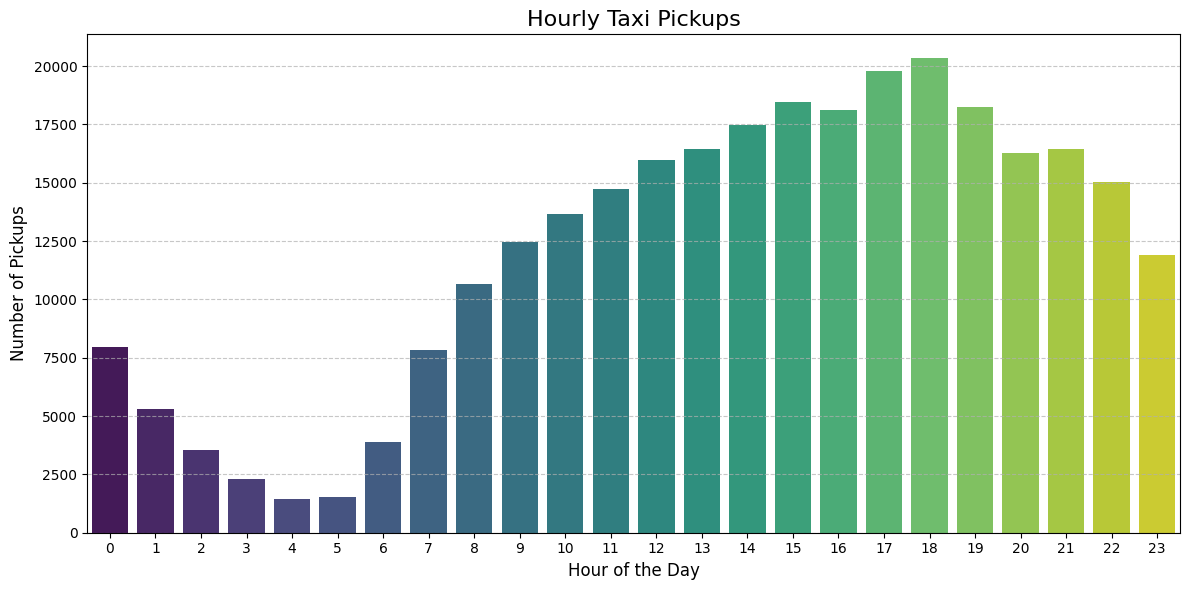

In [46]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by hour and count number of pickups
hourly_pickups = df['pickup_hour'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette='viridis')
plt.title('Hourly Taxi Pickups', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [47]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek
day_names = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
df['pickup_day_by_name'] = df['pickup_day'].map(day_names)
daily_pickups = df['pickup_day_by_name'].value_counts()
print(daily_pickups)


pickup_day_by_name
Thursday     45525
Wednesday    44623
Friday       43064
Tuesday      41893
Saturday     41748
Sunday       36581
Monday       36321
Name: count, dtype: int64


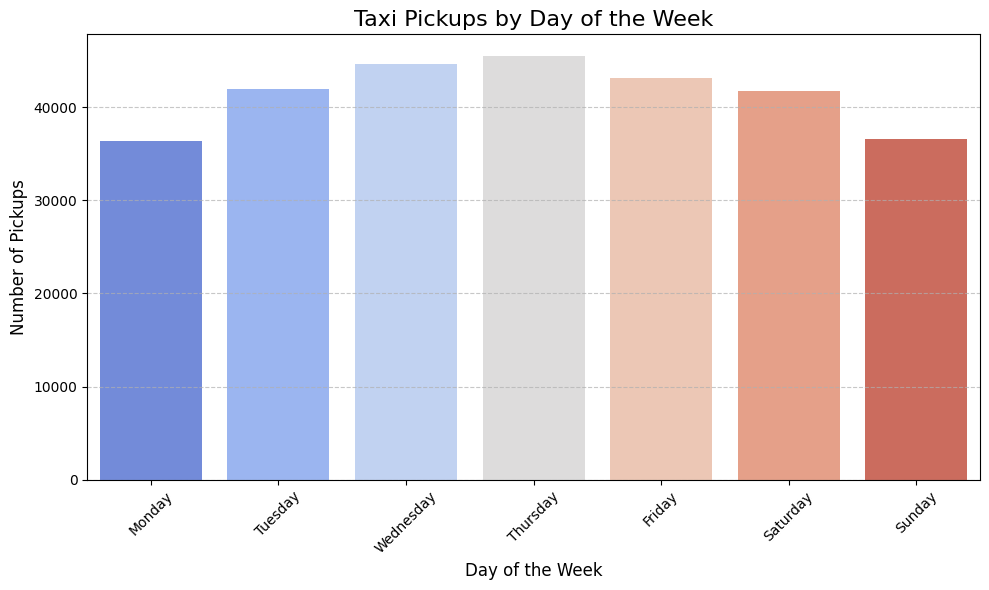

In [48]:
daily_pickups = daily_pickups.reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette='coolwarm')
plt.title('Taxi Pickups by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [49]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_month_name'] = df['tpep_pickup_datetime'].dt.strftime('%B')
df['pickup_month_name'].value_counts()

pickup_month_name
May          26975
October      26470
March        25803
June         25209
November     24939
April        24850
December     24843
January      23651
February     22429
July         22242
August       21303
September    21041
Name: count, dtype: int64

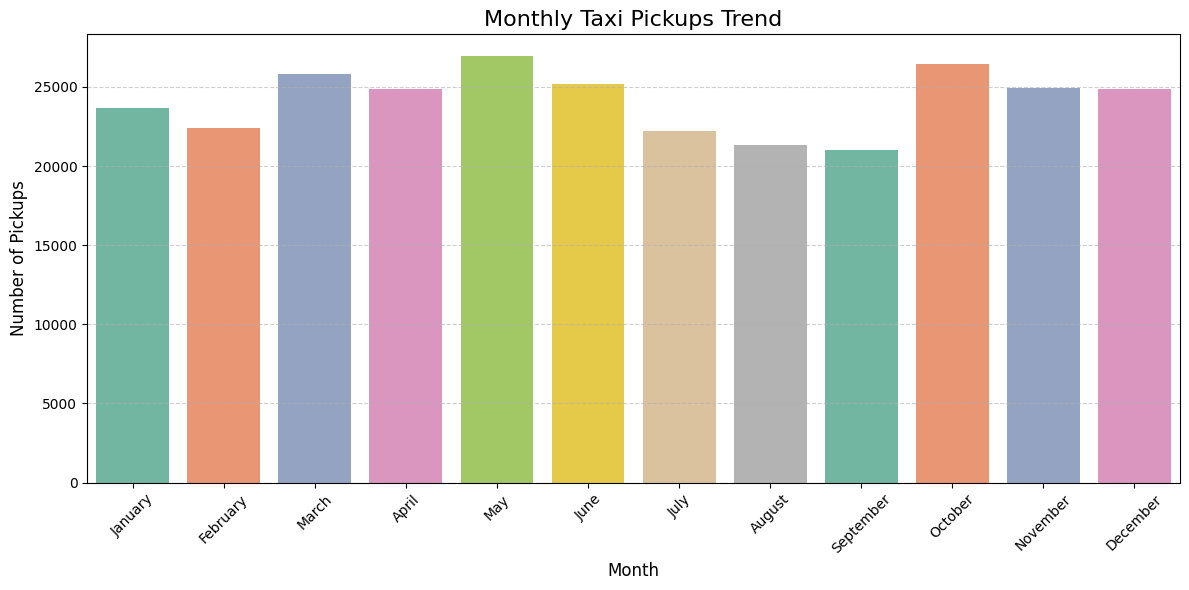

In [50]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_pickups = df['pickup_month_name'].value_counts().reindex(month_order)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette='Set2')
plt.title('Monthly Taxi Pickups Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [51]:
# Analyse the above parameters
cols = ['fare_amount','tip_amount','total_amount','trip_distance']
for col in cols:
    zero_counts = (df[col] == 0).sum()
    negative_counts = (df[col] < 0).sum()
    print(f'{col} : {zero_counts} zero values, {negative_counts} negative values')


fare_amount : 85 zero values, 0 negative values
tip_amount : 64906 zero values, 0 negative values
total_amount : 47 zero values, 0 negative values
trip_distance : 3669 zero values, 0 negative values


In [52]:
#Handling fare_amount zero values
zero_fare_rows = df[df['fare_amount'] == 0]
print(zero_fare_rows['payment_type'].value_counts())
# Drop rows where fare is 0 and payment_type is invalid/suspicious
df = df[~((df['fare_amount'] == 0) & (df['payment_type'].isin([0, 1, 2])))]
print(f"Remaining rows: {df.shape[0]}")

payment_type
1    25
4    21
2    20
3    19
Name: count, dtype: int64
Remaining rows: 289710


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

- Yes, it is beneficial to create a copy of the DataFrame excluding zero or invalid values, especially when performing targeted analysis like calculating averages, detecting outliers, or building models.

- Zero values in columns like fare_amount, trip_distance, or total_amount often indicate anomalies (e.g., data entry errors, disputed rides, or voided transactions). Keeping them in the primary analysis may skew statistics and produce misleading results.

- In this case, I reviewed the zero-value rows and chose to drop those with clearly invalid combinations — such as fare_amount = 0 with payment_type set to Credit Card or Cash — ensuring both accuracy and integrity in the analysis.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [53]:
# Create a df with non zero entries for the selected parameters.
df_nonzero = df[~(
    (df['fare_amount'] == 0) |
    (df['tip_amount'] == 0) |
    (df['total_amount'] == 0) |
    ((df['trip_distance'] == 0) & (df['fare_amount'] == 0))
)].copy()
print("Dataframe with nonzero values created..")
df_nonzero.head()

Dataframe with nonzero values created..


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_hour,pickup_day,pickup_day_by_name,pickup_month,pickup_month_name
1,2,2023-03-26 17:09:01,2023-03-26 17:41:12,1.0,8.07,1.0,138,255,1,40.1,...,0.0,1.0,57.17,0.0,1.25,17,6,Sunday,3,March
2,2,2023-07-03 15:42:37,2023-07-03 15:52:10,1.0,1.35,1.0,211,249,1,10.7,...,0.0,1.0,17.64,2.5,0.00,15,0,Monday,7,July
3,2,2023-02-25 17:59:49,2023-02-25 18:18:40,1.0,1.37,1.0,114,107,1,16.3,...,0.0,1.0,24.36,2.5,0.00,17,5,Saturday,2,February
4,2,2023-01-08 18:27:11,2023-01-08 18:56:37,1.0,7.89,1.0,138,237,1,38.0,...,0.0,1.0,57.65,2.5,1.25,18,6,Sunday,1,January
5,2,2023-05-07 11:11:58,2023-05-07 11:30:23,1.0,10.59,1.0,144,138,1,42.2,...,0.0,1.0,61.44,2.5,0.00,11,6,Sunday,5,May


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

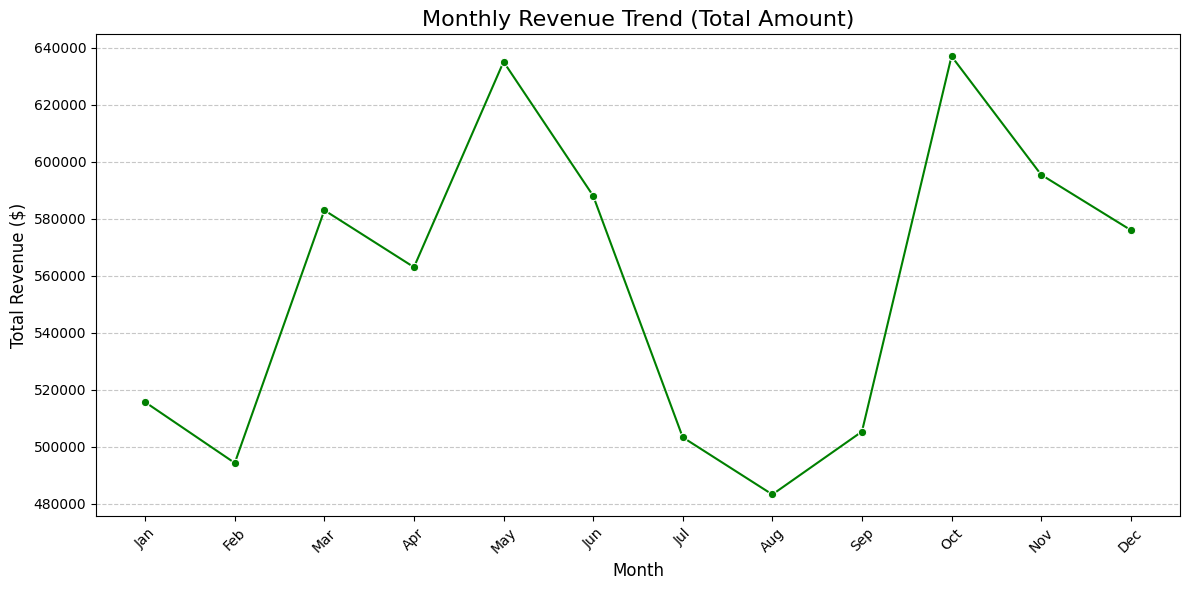

In [54]:
# Group by pickup month and sum total revenue
df_nonzero['pickup_month'] = pd.to_datetime(df_nonzero['tpep_pickup_datetime']).dt.to_period('M')
monthly_revenue = df_nonzero.groupby('pickup_month')['total_amount'].sum()
all_months = pd.period_range(start='2023-01', end='2023-12', freq='M')
monthly_revenue = monthly_revenue.reindex(all_months, fill_value=0)

#Convert index to month names for better display 
monthly_revenue.index = monthly_revenue.index.strftime('%b')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o', color='green')
plt.title('Monthly Revenue Trend (Total Amount)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [55]:
# Calculate proportion of each quarter
df_nonzero['pickup_quater'] = pd.to_datetime(df_nonzero['tpep_pickup_datetime']).dt.to_period('Q')
quarterly_revenue = df_nonzero.groupby('pickup_quater')['total_amount'].sum()
quarterly_proportion = (quarterly_revenue/ quarterly_revenue.sum()) * 100
print(round(quarterly_proportion,2))

pickup_quater
2023Q1    23.85
2023Q2    26.74
2023Q3    22.33
2023Q4    27.08
Freq: Q-DEC, Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

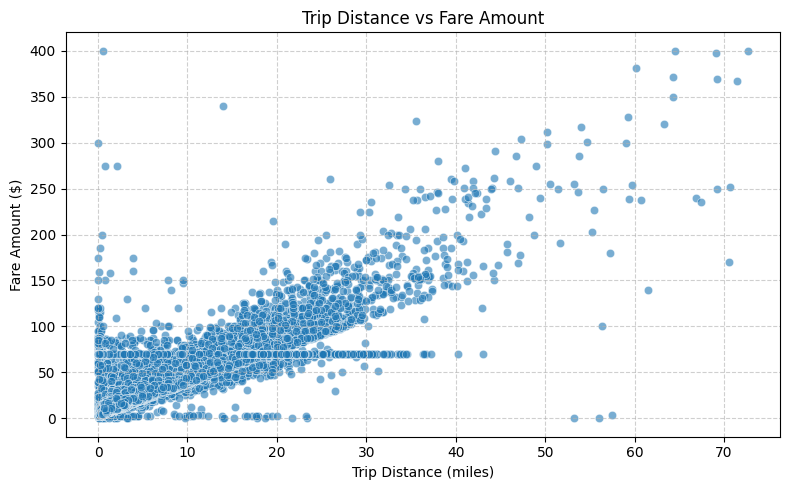

In [56]:
# Show how trip fare is affected by distance
df_nonzero_distance = df[df['trip_distance'] > 0]
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_nonzero_distance,
    x='trip_distance',
    y='fare_amount',
    alpha=0.6
)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

0.9440013659571104


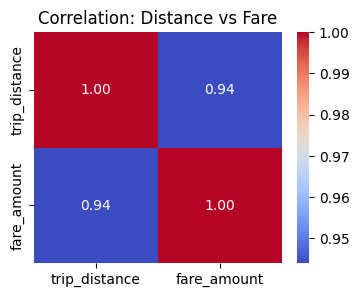

In [57]:
corr_distance_fare = df_nonzero_distance['trip_distance'].corr(df_nonzero_distance['fare_amount'])
print(corr_distance_fare)
plt.figure(figsize=(4, 3))
sns.heatmap(
    df_nonzero_distance[['trip_distance', 'fare_amount']].corr(),
    annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title('Correlation: Distance vs Fare')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between fare amount and trip duration is: 0.31


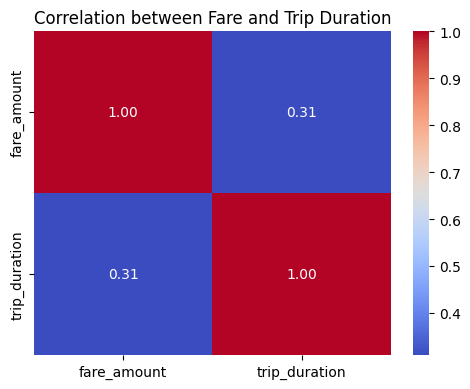

In [58]:
# Show relationship between fare and trip duration
# creating trip duration column
df_nonzero['tpep_pickup_datetime'] = pd.to_datetime(df_nonzero['tpep_pickup_datetime'])
df_nonzero['tpep_dropoff_datetime'] = pd.to_datetime(df_nonzero['tpep_dropoff_datetime'])
df_nonzero['trip_duration'] = df_nonzero['tpep_dropoff_datetime'] - df_nonzero['tpep_pickup_datetime']
#correlation
corr_fare_trip_duration = df_nonzero['fare_amount'].corr(df_nonzero['trip_duration'])
print(f'Correlation between fare amount and trip duration is: {corr_fare_trip_duration:.2f}')

plt.figure(figsize=(5, 4))
sns.heatmap(df_nonzero[['fare_amount', 'trip_duration']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Fare and Trip Duration')
plt.tight_layout()
plt.show()

Correlation between fare amount and passenger count is: 0.04


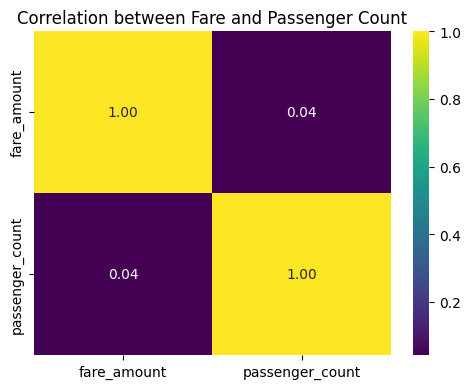

In [59]:
# Show relationship between fare and number of passengers
corr_fare_passenger = df_nonzero['fare_amount'].corr(df_nonzero['passenger_count'])
print(f"Correlation between fare amount and passenger count is: {corr_fare_passenger:.2f}")
plt.figure(figsize=(5, 4))
sns.heatmap(df_nonzero[['fare_amount', 'passenger_count']].corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation between Fare and Passenger Count')
plt.tight_layout()
plt.show()


Correlation between tip amount and trip distance is: 0.78


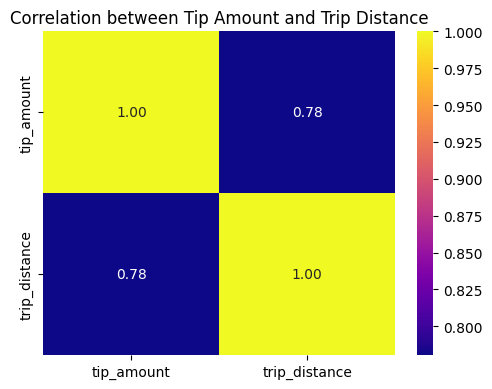

In [60]:
# Show relationship between tip and trip distance
corr_tip_distance = df_nonzero['tip_amount'].corr(df_nonzero['trip_distance'])
print(f"Correlation between tip amount and trip distance is: {corr_tip_distance:.2f}")

plt.figure(figsize=(5, 4))
sns.heatmap(df_nonzero[['tip_amount', 'trip_distance']].corr(), annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation between Tip Amount and Trip Distance')
plt.tight_layout()
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [61]:
# Analyse the distribution of different payment types (payment_type).
df_payment = df[df['payment_type'].isin({1,2,3,4})].copy()
payment_labels = {
    1 : 'Credit card',
    2 : 'Cash',
    3 : 'No charge',
    4 : 'Dispute'
}
df_payment['payment_label'] = df_payment['payment_type'].map(payment_labels)

payment_counts = df_payment['payment_label'].value_counts()
payment_percent = df_payment['payment_label'].value_counts(normalize = True) * 100
print("Payment Type Distribution (Counts):\n", payment_counts)
print("\nPayment Type Distribution (Percentages):\n", round(payment_percent, 2))

Payment Type Distribution (Counts):
 payment_label
Credit card    236064
Cash            49989
Dispute          2188
No charge        1469
Name: count, dtype: int64

Payment Type Distribution (Percentages):
 payment_label
Credit card    81.48
Cash           17.25
Dispute         0.76
No charge       0.51
Name: proportion, dtype: float64


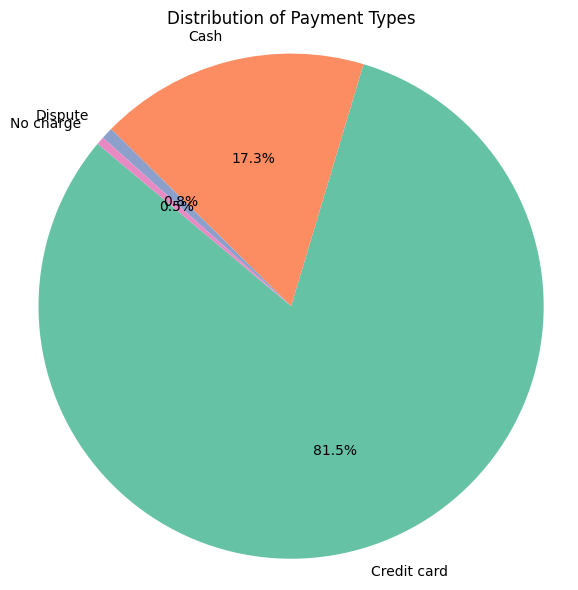

In [62]:
plt.figure(figsize=(6, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'),labeldistance=1.1)
plt.title('Distribution of Payment Types')
plt.axis('equal')
plt.tight_layout()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [63]:
#!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [64]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file("/Users/professorx/Documents/PythonUpgrad/EDA Assignment/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/taxi_zones/taxi_zones.shp") # read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

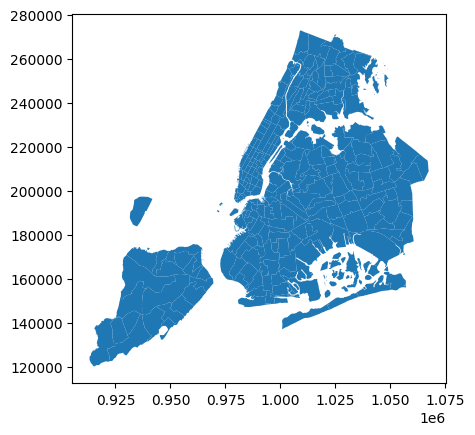

In [65]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [66]:
# Merge zones and trip records using locationID and PULocationID
if 'zone' not in df.columns:
    # Make sure IDs are int
    df['PULocationID'] = df['PULocationID'].astype(int)
    zones['LocationID'] = zones['LocationID'].astype(int)
    
    df = df.merge(
        zones[['LocationID', 'zone', 'borough']],
        left_on='PULocationID',
        right_on='LocationID',
        how='left'
    )
else:
    print("Zones already merged — skipping merge.")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,congestion_surcharge,airport_fee,pickup_hour,pickup_day,pickup_day_by_name,pickup_month,pickup_month_name,LocationID,zone,borough
0,2,2023-11-24 16:57:33,2023-11-24 16:58:33,1.0,0.01,1.0,237,237,4,3.0,...,2.5,0.00,16,4,Friday,11,November,237.0,Upper East Side South,Manhattan
1,2,2023-03-26 17:09:01,2023-03-26 17:41:12,1.0,8.07,1.0,138,255,1,40.1,...,0.0,1.25,17,6,Sunday,3,March,138.0,LaGuardia Airport,Queens
2,2,2023-07-03 15:42:37,2023-07-03 15:52:10,1.0,1.35,1.0,211,249,1,10.7,...,2.5,0.00,15,0,Monday,7,July,211.0,SoHo,Manhattan
3,2,2023-02-25 17:59:49,2023-02-25 18:18:40,1.0,1.37,1.0,114,107,1,16.3,...,2.5,0.00,17,5,Saturday,2,February,114.0,Greenwich Village South,Manhattan
4,2,2023-01-08 18:27:11,2023-01-08 18:56:37,1.0,7.89,1.0,138,237,1,38.0,...,2.5,1.25,18,6,Sunday,1,January,138.0,LaGuardia Airport,Queens


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [67]:
# Group data by location and calculate the number of trips
pickup_counts = df.groupby('PULocationID').size().reset_index(name='trip_count')
print(pickup_counts)


     PULocationID  trip_count
0               1          26
1               3           5
2               4         286
3               5           3
4               6           3
..            ...         ...
235           261        1501
236           262        3828
237           263        5554
238           264        2801
239           265         144

[240 rows x 2 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [68]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = zones.merge(
    pickup_counts,
    left_on='LocationID',
    right_on='PULocationID',
    how='left'
)
zones_with_trips.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,26.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",NaN,NaN
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,5.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,286.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",5.0,3.0


In [69]:
# before mapping -- NaN values to Zeros
zones_with_trips.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.8,0.99])

# zones_with_trips[zones_with_trips['trip_count'] > 500]

,OBJECTID,Shape_Leng,Shape_Area,LocationID,PULocationID,trip_count
count,263.000000,263.000000,263.000000,263.000000,239.000000,239.000000
mean,132.000000,0.094269,0.000402,131.984791,133.016736,1200.092050
std,76.065761,0.054594,0.000482,76.073787,76.917448,2811.078164
min,1.000000,0.014306,0.000006,1.000000,1.000000,1.000000
1%,3.620000,0.023376,0.000023,3.620000,4.380000,1.000000
10%,27.200000,0.036925,0.000068,27.200000,25.800000,3.000000
25%,66.500000,0.054722,0.000133,66.500000,66.500000,8.000000
50%,132.000000,0.084341,0.000268,132.000000,135.000000,21.000000
75%,197.500000,0.119488,0.000480,197.500000,200.500000,210.000000
80%,210.600000,0.131153,0.000547,210.600000,213.400000,954.800000


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

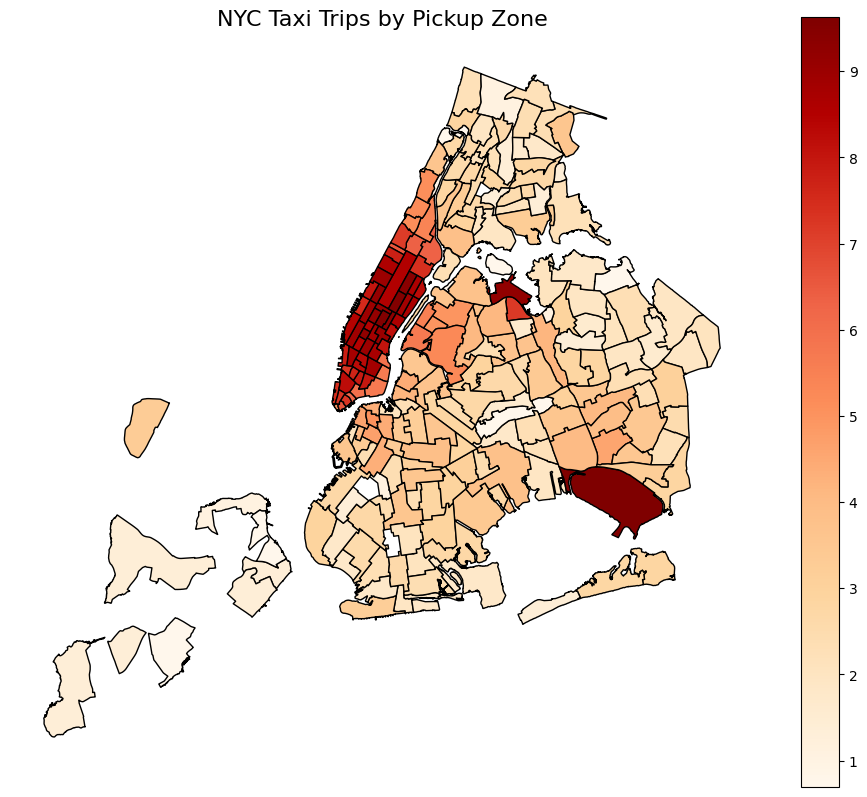

In [70]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
# zones_with_trips.plot(
#     column='trip_count',          # Column to base colors on
#     ax=ax,                        # Axis to plot on
#     legend=True,                  # Show legend
#     legend_kwds={
#         'label': "Number of Trips per Zone",
#         'orientation': "horizontal"  # Legend orientation
#     },
#     cmap='OrRd',                  # Color map (Orange-Red)
#     edgecolor='black',            # Border color for zones
#     linewidth=0.5                  # Border line thickness
# )
zones_with_trips['log_trip_count'] = np.log1p(zones_with_trips['trip_count'])
zones_with_trips.plot(
    column='log_trip_count',
    ax=ax,
    legend=True,
    cmap='OrRd',
    edgecolor='black'
)

# Title
plt.title("NYC Taxi Trips by Pickup Zone", fontsize=16)
plt.axis('off')  # Hide axis

# Show the plot
plt.show()


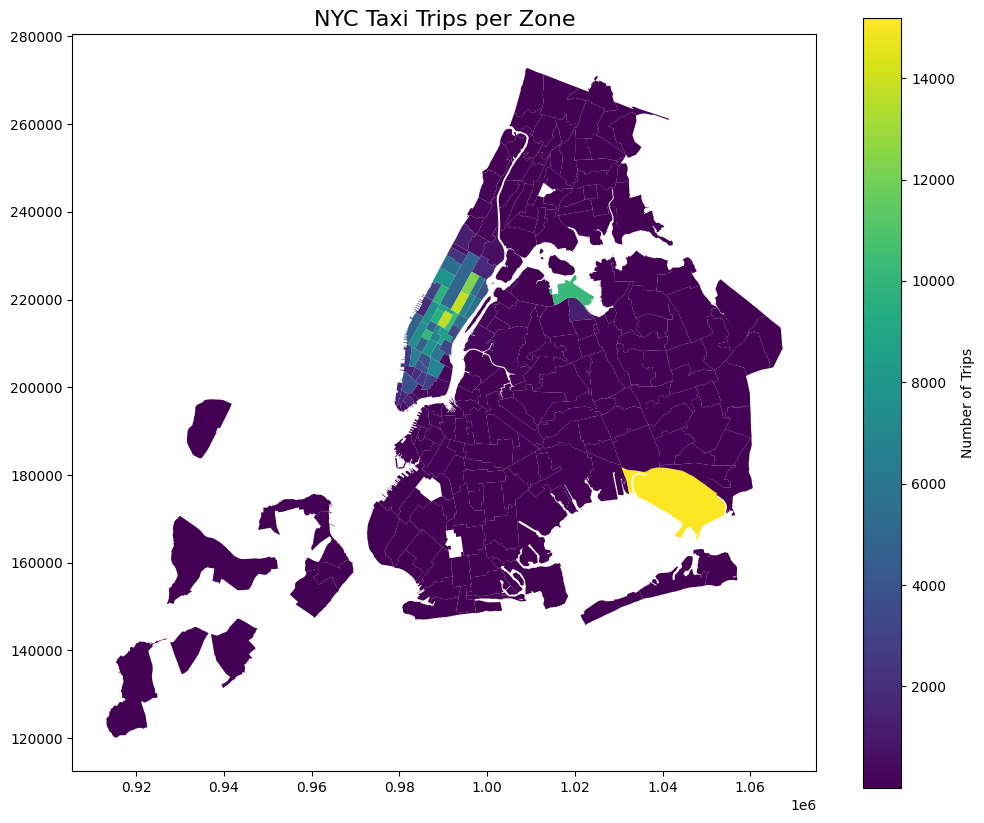

In [71]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones_with_trips.sort_values(by='trip_count', ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_trips.plot(
    column='trip_count',
    ax=ax,
    legend=True,
    cmap='viridis',
    legend_kwds={'label': "Number of Trips", 'orientation': "vertical"}
)
ax.set_title("NYC Taxi Trips per Zone", fontsize=16)
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [72]:
# Find routes which have the slowest speeds at different times of the day



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [73]:
# Visualise the number of trips per hour and find the busiest hour



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [74]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =



SyntaxError: invalid syntax (2793492136.py, line 4)

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts




**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.